# Connect to MongoDB

In [200]:
import json

#  load secrets.json file 
with open('E:\git\secrets.json') as f:
    data = json.load(f)

    secret_pass = data['mongodb']

#  print the length of the secret pass.
print(f"My secret key is {len(secret_pass)} characters in length.")

My secret key is 81 characters in length.


In [201]:
import pymongo
import certifi


#  retrieved connection string from a secrets file
mongo_connection_string = data['mongodb']

# Connecting to the database 
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

# Fetch the database named "DA320_IMDB"
db = client['DA320_IMDB']

# display the database with all collections
allCollections = db.list_collection_names()

# list of collections in my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.6.
This database has the collections ['IMDB', 'Metacritic', 'IMDB_view_Horror genres', 'IMDB_view_director2', 'IMDB_view_eq_Romance', 'IMDB_view2', 'IMDB_view_year', 'IMDB_view1', 'IMDB_view1_year2015', 'IMDB_view0']


# Fetch two time-series collection for a specific year (2010) merging together

### Fetch IMDB-view2 and Metacritic collections for specific year from mangodb

In [202]:
import pandas as pd
import re 

#find data for specific year,  i used my transformed data from IMDB_view2
imdb_view= pd.DataFrame(db.IMDB_view2 .find ({"year":2010}))

#find data from metacritic in the same year 
metacritic_view= pd.DataFrame (db.Metacritic.find({"release_date":re.compile("2010")}))

#converting the values in the meacritic to numbers and date
metacritic_view.score=pd.to_numeric (metacritic_view.score, errors="coerce")
metacritic_view.release_date=pd.to_datetime(metacritic_view.release_date, errors="coerce")

display(imdb_view)
display (metacritic_view)


,_id,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date,genres,...,castTrimmed,director,directorTrimmed,producer,producerTrimmed,company,companyTrimmed,mpaa_rating,rating,year
0,646bd905b04a0be6812c6d11,The Tourist,103.0,6.0,240865.0,100000000.0,16472458.0,278346189.0,2010-12-06,"[Action, Thriller]",...,"[Johnny Depp, Angelina Jolie, Paul Bettany, Ti...",[Florian Henckel von Donnersmarck],[Florian Henckel von Donnersmarck],"[Gary Barber, John Bernard, Roger Birnbaum, ...","[Gary Barber, John Bernard, Roger Birnbaum, Ol...","[GK Films, Columbia Pictures, Spyglass Enter...","[GK Films, Columbia Pictures, Spyglass Enterta...",PG-13,PG-13,2010
1,646bd905b04a0be6812c6d12,The Town,125.0,7.5,384165.0,37000000.0,23808032.0,154026136.0,2010-09-08,"[Crime, Drama, Thriller]",...,"[Ben Affleck, Rebecca Hall, Jon Hamm, Jeremy R...",[Ben Affleck],[Ben Affleck],"[Chay Carter, David Crockett, William Fay, ...","[Chay Carter, David Crockett, William Fay, Bas...","[Warner Bros., Legendary Entertainment, GK F...","[Warner Bros., Legendary Entertainment, GK Fil...",R,R,2010
2,646bd905b04a0be6812c6d21,The Way Back,133.0,7.3,115947.0,NaN,1208196.0,20348249.0,2010-09-03,"[Adventure, Drama, History]",...,"[Dragos Bucur, Colin Farrell, Ed Harris, Alexa...",[Peter Weir],[Peter Weir],"[Jimmy Abounouom, Karim Abouobayd, Mohamed K...","[Jimmy Abounouom, Karim Abouobayd, Mohamed Kha...","[Exclusive Films, National Geographic Films, ...","[Exclusive Films, National Geographic Films, I...",PG-13,PG-13,2010
3,646bd905b04a0be6812c6d32,The Switch,101.0,6.1,104935.0,19000000.0,8436713.0,NaN,2010-08-16,"[Comedy, Drama, Romance]",...,"[Jason Bateman, Victor Pagan, Jennifer Aniston...","[Josh Gordon, Will Speck]","[Josh Gordon, Will Speck]","[Jennifer Aniston, Brian Bell, Albert Berger...","[Jennifer Aniston, Brian Bell, Albert Berger, ...","[Mandate Pictures, Bona Fide Productions, Ec...","[Mandate Pictures, Bona Fide Productions, Echo...",PG-13,PG-13,2010
4,646bd905b04a0be6812c6d3f,Due Date,95.0,6.5,340725.0,65000000.0,32689406.0,211780824.0,2010-10-31,"[Comedy, Drama]",...,"[Robert Downey Jr., Zach Galifianakis, Michell...",[Todd Phillips],[Todd Phillips],"[Scott Budnick, Susan Downey, Joseph Garner,...","[Scott Budnick, Susan Downey, Joseph Garner, D...","[Warner Bros., Legendary Entertainment, Gree...","[Warner Bros., Legendary Entertainment, Green ...",TV-14,TV-14,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,646bd905b04a0be6812c70d5,A Film Unfinished,88.0,7.4,1818.0,NaN,NaN,NaN,2010-01-25,"[Documentary, Drama, History]",...,"[Hanna Avrutzki, Luba Gewisser, Jurek Plonski,...",[Yael Hersonski],[Yael Hersonski],"[Christian Bauer, Dagmar Biller, Itai Ken-To...","[Christian Bauer, Dagmar Biller, Itai Ken-Tor,...","[, , , , ]","[, , , , ]",Unrated,Unrated,2010
1025,646bd905b04a0be6812c70d8,Lyubov v bolshom gorode 2,89.0,5.6,1181.0,2500000.0,NaN,NaN,2010-02-18,"[Comedy, Fantasy]",...,"[Aleksey Chadov, Vera Brezhneva, Volodymyr Zel...",[Marius Balchunas],[Marius Balchunas],"[Oliver Ackermann, Marius Balchunas, Sasha K...","[Oliver Ackermann, Marius Balchunas, Sasha Kap...","[Leopolis, Living Films]","[Leopolis, Living Films]",Not Rated,Not Rated,2010
1026,646bd905b04a0be6812c70f1,Get Lamp,78.0,6.8,2733.0,75000.0,NaN,NaN,2010-03-26,[Documentary],...,"[Ernest Adams, Scott Adams, Hollywood Anderson...",[Jason Scott Sadofsky],[Jason Scott Sadofsky],[Jason Scott Sadofsky],[Jason Scott Sadofsky],[Bovine Ignition Systems],[Bovine Ignition Systems],Not Rated,Not Rated,2010
1027,646bd905b04a0be6812c70f7,Y'en aura pas de facile,94.0,7.1,1347.0,NaN,NaN,NaN,2010-08-27,[Comedy],...,"[Rémy Girard, Denis Bouchard, Emmanuel Bilodea...",[Marc-André Lavoie],[Marc-André Lavoie],"[Adrien Bodson, Pierre Brousseau, Marc-André...","[Adrien Bodson, Pierre Brousseau, Marc-André L...","[Les Films Seville, Orange Médias]","[Les Films Seville, Orange Médias]",Not Rated,Not Rated,2010


,_id,movie_id,title,release_date,description,score,thumbnail
0,6477b24320c109d0a61c6616,15647,45365,2010-06-18,45365 takes us on an unforgettable journey int...,88,https://static.metacritic.com/images/products/...
1,6477b24320c109d0a61c6636,15679,Let Me In,2010-10-01,An alienated 12-year-old boy befriends a myste...,79,https://static.metacritic.com/images/products/...
2,6477b24320c109d0a61c663c,15685,Waste Land,2010-10-29,"Filmed over nearly three years, WASTE LAND fol...",78,https://static.metacritic.com/images/products/...
3,6477b24320c109d0a61c6641,15690,Get Low,2010-07-30,"A film spun out of equal parts folk tale, fabl...",77,https://static.metacritic.com/images/products/...
4,6477b24320c109d0a61c6643,15692,And Everything Is Going Fine,2010-12-10,And Everything Is Going Fine provides an intim...,76,https://static.metacritic.com/images/products/...
...,...,...,...,...,...,...,...
431,6477b24320c109d0a61c679b,16036,The Human Centipede (First Sequence),2010-04-28,During a stopover in Germany in the middle of ...,33,https://static.metacritic.com/images/products/...
432,6477b24320c109d0a61c679d,16038,Legion,2010-01-22,"When God loses faith in Mankind, he sends his ...",32,https://static.metacritic.com/images/products/...
433,6477b24320c109d0a61c67a9,16050,You Again,2010-09-24,Successful PR pro Marni heads home for her old...,28,https://static.metacritic.com/images/products/...
434,6477b24320c109d0a61c67bb,16068,Alien Girl,2010-12-17,The sister of a prominent Russian gang member ...,21,https://static.metacritic.com/images/products/...


### Merging two datasets together

In [203]:
# merging two dataset together using an inner Join based on the title
unified_view=pa.merge(imdb_view, metacritic_view, how="inner", on="title")
unified_view.head()

,_id_x,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date_x,genres,...,companyTrimmed,mpaa_rating,rating,year,_id_y,movie_id,release_date_y,description,score,thumbnail
0,646bd905b04a0be6812c6d11,The Tourist,103.0,6.0,240865.0,100000000.0,16472458.0,278346189.0,2010-12-06,"[Action, Thriller]",...,"[GK Films, Columbia Pictures, Spyglass Enterta...",PG-13,PG-13,2010,6477b24320c109d0a61c6788,16017,2010-12-10,Johnny Depp stars as an American tourist whose...,37,https://static.metacritic.com/images/products/...
1,646bd905b04a0be6812c6d12,The Town,125.0,7.5,384165.0,37000000.0,23808032.0,154026136.0,2010-09-08,"[Crime, Drama, Thriller]",...,"[Warner Bros., Legendary Entertainment, GK Fil...",R,R,2010,6477b24320c109d0a61c665b,15716,2010-09-17,There are over 300 bank robberies in Boston ev...,74,https://static.metacritic.com/images/products/...
2,646bd905b04a0be6812c6d32,The Switch,101.0,6.1,104935.0,19000000.0,8436713.0,NaN,2010-08-16,"[Comedy, Drama, Romance]",...,"[Mandate Pictures, Bona Fide Productions, Echo...",PG-13,PG-13,2010,6477b24320c109d0a61c6727,15920,2010-08-20,An unmarried 40-year-old woman turns to a turk...,52,https://static.metacritic.com/images/products/...
3,646bd905b04a0be6812c6d3f,Due Date,95.0,6.5,340725.0,65000000.0,32689406.0,211780824.0,2010-10-31,"[Comedy, Drama]",...,"[Warner Bros., Legendary Entertainment, Green ...",TV-14,TV-14,2010,6477b24320c109d0a61c672e,15927,2010-11-05,Peter Highman is an expectant first-time fathe...,51,https://static.metacritic.com/images/products/...
4,646bd905b04a0be6812c6d57,All Good Things,101.0,6.3,56106.0,NaN,37172.0,NaN,2010-11-05,"[Crime, Drama, Mystery, Romance, Thriller]",...,"[Groundswell Productions, Hit The Ground Runni...",R,R,2010,6477b24320c109d0a61c66f0,15865,2010-12-03,All Good Things is a love story and murder mys...,57,https://static.metacritic.com/images/products/...


# Create a classifire Pipeline for distilbert-base-uncased 

In [299]:


from transformers import pipeline

# Uses classification library published on https://huggingface.co/distilbert-base-uncased
classifier = pipeline("fill-mask", model="distilbert-base-uncased")

# creating empthy list 
countries=[]

#with using description coulmn ask a question about the country of the movie that produced.
for description in unified_view['description']:
    country_prediction= classifier (f"The description of movie is {description}. This movie is produce in the country of [MASK].")
    country=country_prediction[0]['token_str'].lower()
    countries.append(country)

#adding new column to the unified_view table
unified_view["countries"]=countries

#show the table with the new column
unified_view.head()


,_id_x,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date_x,genres,...,release_date_y,description,score,thumbnail,countries,categories,movie_ending,movie_ending1,ending,ending1
0,646bd905b04a0be6812c6d11,The Tourist,103.0,6.0,240865.0,100000000.0,16472458.0,278346189.0,2010-12-06,"[Action, Thriller]",...,2010-12-10,Johnny Depp stars as an American tourist whose...,37,https://static.metacritic.com/images/products/...,brazil,romance,tragic,happy,tragic,happy
1,646bd905b04a0be6812c6d12,The Town,125.0,7.5,384165.0,37000000.0,23808032.0,154026136.0,2010-09-08,"[Crime, Drama, Thriller]",...,2010-09-17,There are over 300 bank robberies in Boston ev...,74,https://static.metacritic.com/images/products/...,england,thriller,tragic,different,tragic,different
2,646bd905b04a0be6812c6d32,The Switch,101.0,6.1,104935.0,19000000.0,8436713.0,NaN,2010-08-16,"[Comedy, Drama, Romance]",...,2010-08-20,An unmarried 40-year-old woman turns to a turk...,52,https://static.metacritic.com/images/products/...,turkey,romance,tragic,different,tragic,different
3,646bd905b04a0be6812c6d3f,Due Date,95.0,6.5,340725.0,65000000.0,32689406.0,211780824.0,2010-10-31,"[Comedy, Drama]",...,2010-11-05,Peter Highman is an expectant first-time fathe...,51,https://static.metacritic.com/images/products/...,georgia,romance,tragic,happy,tragic,happy
4,646bd905b04a0be6812c6d57,All Good Things,101.0,6.3,56106.0,NaN,37172.0,NaN,2010-11-05,"[Crime, Drama, Mystery, Romance, Thriller]",...,2010-12-03,All Good Things is a love story and murder mys...,57,https://static.metacritic.com/images/products/...,pakistan,thriller,tragic,happy,tragic,happy


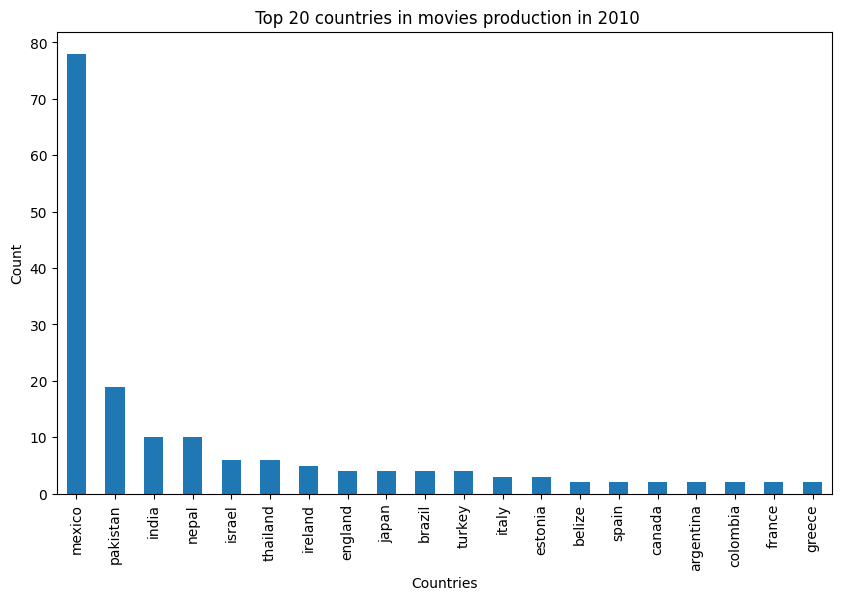

In [331]:
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
plt.figure(figsize=(10,6))
unified_view["countries"].value_counts()[:20].plot(kind='bar')
plt.title(" Top 20 countries in movies production in 2010")
plt.xlabel("Countries")
plt.ylabel("Count")
plt.show()

Conclusion: Assuming that results from distilbert are reliable, we can see most of the movies in 2010 are produced in the Mexico and following by Pakistan. 

In [332]:

#creating empty list 
categories=[]

# with using description coulmn ask a question about the genre of the movie.
for description in unified_view['description']:
    genre_prediction= classifier (f"The description of movie is {description}. it belongs to the genre of [MASK].")
    genre=genre_prediction[0]['token_str'].lower()
    categories.append(genre)

#adding new column to the unified_view table
unified_view["categories"]=categories

#show the table with new column
unified_view.head()



,_id_x,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date_x,genres,...,release_date_y,description,score,thumbnail,countries,categories,movie_ending,movie_ending1,ending,ending1
0,646bd905b04a0be6812c6d11,The Tourist,103.0,6.0,240865.0,100000000.0,16472458.0,278346189.0,2010-12-06,"[Action, Thriller]",...,2010-12-10,Johnny Depp stars as an American tourist whose...,37,https://static.metacritic.com/images/products/...,brazil,romance,tragic,happy,tragic,happy
1,646bd905b04a0be6812c6d12,The Town,125.0,7.5,384165.0,37000000.0,23808032.0,154026136.0,2010-09-08,"[Crime, Drama, Thriller]",...,2010-09-17,There are over 300 bank robberies in Boston ev...,74,https://static.metacritic.com/images/products/...,england,thriller,tragic,different,tragic,different
2,646bd905b04a0be6812c6d32,The Switch,101.0,6.1,104935.0,19000000.0,8436713.0,NaN,2010-08-16,"[Comedy, Drama, Romance]",...,2010-08-20,An unmarried 40-year-old woman turns to a turk...,52,https://static.metacritic.com/images/products/...,turkey,romance,tragic,different,tragic,different
3,646bd905b04a0be6812c6d3f,Due Date,95.0,6.5,340725.0,65000000.0,32689406.0,211780824.0,2010-10-31,"[Comedy, Drama]",...,2010-11-05,Peter Highman is an expectant first-time fathe...,51,https://static.metacritic.com/images/products/...,georgia,romance,tragic,happy,tragic,happy
4,646bd905b04a0be6812c6d57,All Good Things,101.0,6.3,56106.0,NaN,37172.0,NaN,2010-11-05,"[Crime, Drama, Mystery, Romance, Thriller]",...,2010-12-03,All Good Things is a love story and murder mys...,57,https://static.metacritic.com/images/products/...,pakistan,thriller,tragic,happy,tragic,happy


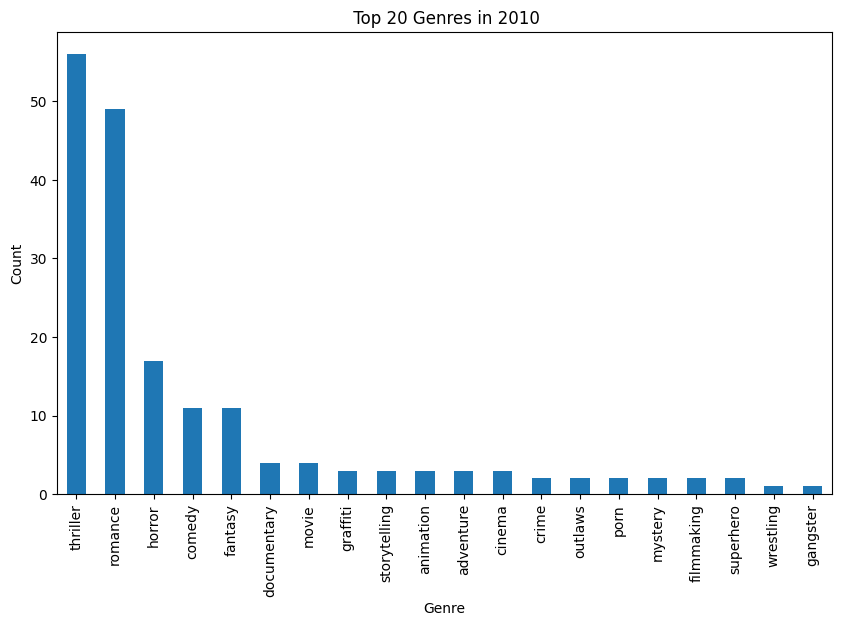

In [333]:
import pandas as pd
from matplotlib import pyplot 
pyplot.figure(figsize=(10,6))
unified_view["categories"].value_counts()[:20].plot(kind='bar')
plt.title(" Top 20 Genres in 2010")
plt.xlabel("Genre")
plt.ylabel("Count")
pyplot.show()

Conclusion: The Thriller and Romance Genres have the highest count in 2010


In [334]:
# for this part I try to predict the end of the movies in 2010 based on description and title of the movies. 


#predict the end of the movies in 2010 based on description 
#creating empty list 
ending=[]

#with using description coulmn in unified_view table ask a question about the end of movie.
for description in unified_view['description']:
    end_prediction= classifier (f"The description of movie is {description}. this movie has a [MASK] ending.")
    end=end_prediction[0]['token_str'].lower()
    ending.append(end)

#adding new column to the unified_view table
unified_view["ending"]=ending

#show the table with new column
unified_view.head()




#predict the end of the movies in 2010 based on title
#creating empty list 
ending1=[]

#with using title coulmn in unified_view table ask a question about the end of movie
for description in unified_view['title']:
    end_prediction= classifier (f"The description of movie is {description}. this movie has a [MASK] ending.")
    end=end_prediction[0]['token_str'].lower()
    ending1.append(end)

#adding new column to the unified_view table
unified_view["ending1"]=ending1

#show the table with new column
unified_view.head()


,_id_x,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date_x,genres,...,release_date_y,description,score,thumbnail,countries,categories,movie_ending,movie_ending1,ending,ending1
0,646bd905b04a0be6812c6d11,The Tourist,103.0,6.0,240865.0,100000000.0,16472458.0,278346189.0,2010-12-06,"[Action, Thriller]",...,2010-12-10,Johnny Depp stars as an American tourist whose...,37,https://static.metacritic.com/images/products/...,brazil,romance,tragic,happy,tragic,happy
1,646bd905b04a0be6812c6d12,The Town,125.0,7.5,384165.0,37000000.0,23808032.0,154026136.0,2010-09-08,"[Crime, Drama, Thriller]",...,2010-09-17,There are over 300 bank robberies in Boston ev...,74,https://static.metacritic.com/images/products/...,england,thriller,tragic,different,tragic,different
2,646bd905b04a0be6812c6d32,The Switch,101.0,6.1,104935.0,19000000.0,8436713.0,NaN,2010-08-16,"[Comedy, Drama, Romance]",...,2010-08-20,An unmarried 40-year-old woman turns to a turk...,52,https://static.metacritic.com/images/products/...,turkey,romance,tragic,different,tragic,different
3,646bd905b04a0be6812c6d3f,Due Date,95.0,6.5,340725.0,65000000.0,32689406.0,211780824.0,2010-10-31,"[Comedy, Drama]",...,2010-11-05,Peter Highman is an expectant first-time fathe...,51,https://static.metacritic.com/images/products/...,georgia,romance,tragic,happy,tragic,happy
4,646bd905b04a0be6812c6d57,All Good Things,101.0,6.3,56106.0,NaN,37172.0,NaN,2010-11-05,"[Crime, Drama, Mystery, Romance, Thriller]",...,2010-12-03,All Good Things is a love story and murder mys...,57,https://static.metacritic.com/images/products/...,pakistan,thriller,tragic,happy,tragic,happy


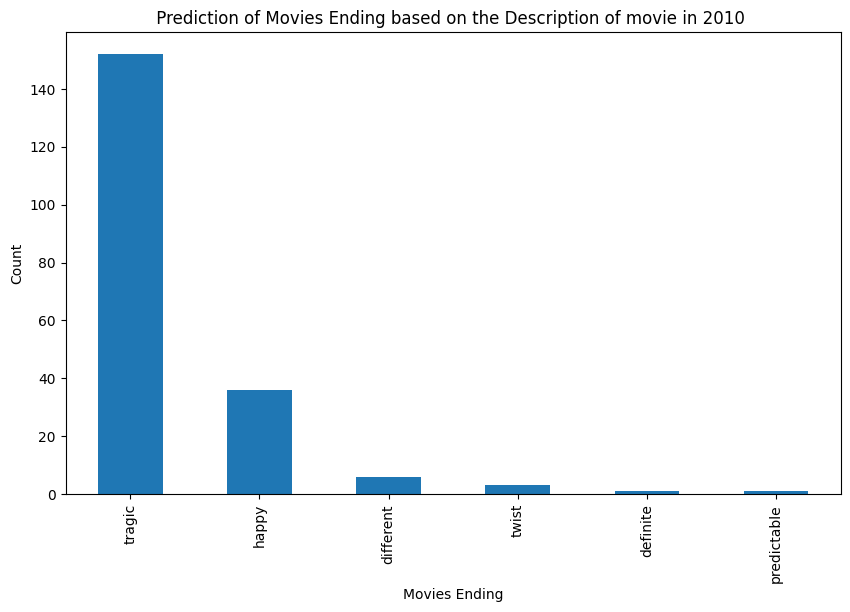

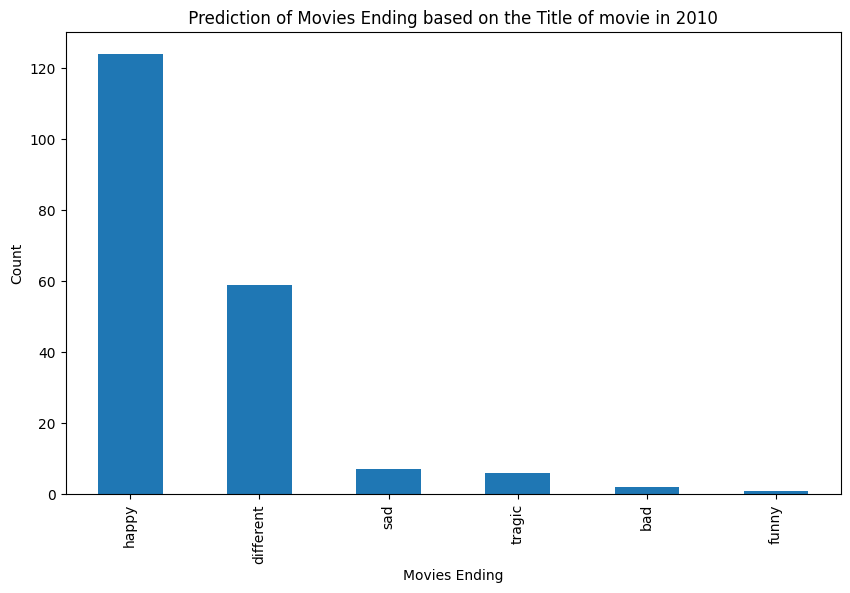

In [335]:
import pandas as pd
from matplotlib import pyplot

# Creating plot for end of the movies based on the description of the movie 
pyplot.figure(figsize=(10,6))
unified_view["ending"].value_counts().plot(kind='bar')
plt.title(" Prediction of Movies Ending based on the Description of movie in 2010  ")
plt.xlabel("Movies Ending")
plt.ylabel("Count")
pyplot.show()



# Creating plot for end of the movies based on the title of the movie 
pyplot.figure(figsize=(10,6))
unified_view["ending1"].value_counts()[:20].plot(kind='bar')
plt.title(" Prediction of Movies Ending based on the Title of movie in 2010 ")
plt.xlabel("Movies Ending")
plt.ylabel("Count")
pyplot.show()

Conclusion: In the first plot, the predictions are obtained by using descriptons as inputs. We can observe that most of the movies have tragic ending. The second plot, however, is obtained by using title as inputs. We can see most of the movies have happy ending. In my opinion, the first prediction should be more reliable because in the description part we have more details of the movie for predicting of the end.